# 2.6 Data Analysis
##  Example 2, Part 6: pH-Rate Profile Example - Kirby 2002

Tony Kirby is one of the giants of physical organic and bio-organic chemistry. In this paper he follows up on a decades-long series of papers investigating the mechanism of *amylases* that catalyze the hydrolysis of acetal groups in polysaccharide chains.

``Concerted general acid and nucleophilic catalysis of acetalhydrolysis. A simple model for the lysozyme mechanism''. K.E.S. Deana, A.J. Kirby, *J. Chem. Soc., Perkin Trans. 2*, **2002**, 428-432. https://doi.org/10.1039/B110948K. 

This *Python* notebook will curve fit the equation the model for the values of $k_1$ and $k_2$. Both are observed rate consatnts for different reactions that demonstrate acid and base catalysis. $k_1$ is the observed rate constant for acetal hydrolysis in the starting material and $k_2$ is the observed rate consant for ester hydrolysis of the intermediate. Both rate constants have a dependance on pH, indicating acid/base catalysis.

## The Equation

For our reaction system...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

We have determined the values of $k_1$ and $k_2$ along a series of different values for $\left[H^+\right]$

For $k_1$, the model for acid/base catalysis is $\frac{-d[A]}{dt} = k_1 [A]$. We will see that this observed rate is the total of the rate of neutral caroxylic acid attack at the protonated acetal group ($k_{AH_3^+}[AH_3^+]$), the rate of neutral caroxylic acid attack on the neutral acetal group with general-acid assistance from the other neutral carboxylic acid ($k_{AH_3^+}[AH_3^+]$), and the rate of attack of the anionic carboxylate attack on the neutral acetal group with general-acid assistance from the other neutral caroxylic acid($k_{AH_3^+}[AH_3^+]$). The rate of nucleophilic attack on an acetal without acid catalysis is negligible so there is no rate contibution for the dianion or for direct hydroxide attack. Thus the total value for the rate could be taken to be...

$$\begin{align*}
\frac{-d[A]}{dt} =\nu &= \nu_{AH_3^+} + \nu_{AH_2} + \nu_{AH^-} \\
                  \nu &= k_{AH_3}[AH_3^+] + k_{AH_2}[AH_2] + k_{AH}[AH^-]
\end{align*}
$$

There are three acid equilibria here...

$$\begin{align*}
K_{a_{AH_3}} &= \frac{[AH_2][H^+]}{[AH_3^+]} \\
K_{a_{AH_2}} &= \frac{[AH^-][H^+]}{[AH_2]} \\
K_{a_{AH}} &= \frac{[A^{2-}][H^+]}{[AH^-]} 
\end{align*}
$$

...and...

$$[A] = [AH_3^+] + [AH_2] + [AH^-] + [A^{2-}]$$

### The Equations as Used by the Authors

The authors of the paper considered the value of $[AH_3^+]$ to be insignificant relative to $[A]_t$ in the pH range studies. This is a reasonable statement as the protonated acetal, which will contribute greatly to the observed rate of reaction, is still only a tiny fraction of the population unless we reach extreme acidity. We will not be able to determine the value of $K_{a_{AH_3^+}}$ from the curve fit and it is best to ignore it. In practice this means that $k_{AH_3^+}$ will be a second-order rate consant for the reaction of $AH_2$ and $H^+$ to give the product and that the value of $k_{AH_3^+}$ will include wthe value of $K_{a_{AH_3^+}}$ within it.

So the equation 4 in the paper is derived from the following rate law and value for $[A]_t$...

$$\begin{align*}
\nu &= k_{H}[H^+][AH_2] + k_{AH_2}[AH_2] + k_{AH}[AH^-] \\
[A] &= [AH_2] + [AH^-] + [A^{2-}]
\end{align*}
$$
...where $k_{H^+}$ is the second-order rate constant for the specific acid catalyzed reaction of the neutral diacid.

With the two statements above we can derive the equation that describes the value of $k_1$ as $[H^+]$ changes.

$$ \nu_T = 
\frac{k_{H}[H^+]^3 + {k_{AH_2} [H^+]^2} + k_{AH}K_{a_{AH_2}}[H^+]}
{{ [H^+]^2} + { K_{a_{AH_2}} [H^+]} + { K_{a_{AH_2}} K_{a_{AH}}} } [A]$$

And so the observed rate constant at a given pH is described by the following equation...

$$ k_1 = 
\frac{k_{H^+}[H^+]^3 + {k_{AH_2} [H^+]^2} + k_{AH}K_{a_{AH_2}}[H^+]}
{{ [H^+]^2} + { K_{a_{AH_2}} [H^+]} + { K_{a_{AH_2}} K_{a_{AH}}} } $$
...where...
$$ \nu = k_1 [A]$$

### A Note on $k_H$

 If we consider the rate contribution for the $AH_3^+$ species we would have...

$$\nu_{AH_3^+}=k_{AH_3}[AH_3^+] = k_{AH_3}\frac{[H^+][AH_2]}{K_{a_{AH_3}}} $$

...thus we see that $k_{H} =  k_{AH_3} / K_{a_{AH_3^+}}$ and the two values of $k_{AH_3}$ and $K_{a_{AH_3}}$ cannot be determined independantly unless we get to extreme acidities where we see the Arrhenius complex forming in the rate profile (we would need to see the curve leveling off to detect the value of $K_{a_{AH_3}}$.)

### A Note on $K_{a_{AH_3^+}}$

The acidity of a protonated acetal is extreme and we are well outside of a pH range where $[AH_3^+]$ will be significant relative to the total amount of $[A]$. How can we know this? the Bordwell $pK_a$ table reports that the $pK_a$ for a protonated ether is $-3.8$. An acetal will have an electron-withdrawing alkoxy group present so we can expect that the positively charged protonated form is even higher in energy and that the $pK_a$ is more negative that $-3.8$. In the table I note that the $pK_a$ of a protonated ketone and a protonated methy ester are $-3.1$ and $-3.9$ respectively. The electron-withrawing alkoxy group increased the acidity by almost a whole $pH$ unit. In that example there would still be some resononce stabilization via the lone pair on the oxygen. In the case of an acetal there would be no resonance donation, only inductive electron withdrawal. So I expect that the difference between a protonated ether and a protonated acetal would be greater than in the case of a protonated ketone compared to an protonated ester.

My conclusion is that the $pK_a$ value for a protonated acetal is much more neagtive than $-3.8$ and since we are in acidities less that $pH = 0$ we can safely ignore $AH_3^+$ in the total concentration for all species of $A$. 

You can check the Bordwell table yourself at https://organicchemistrydata.org/hansreich/resources/pka/

## Load the Data

Let use load in the data set we obtained from the kinetic runs. in the code below we will import the data and plot the values of $k_1$ v pH.

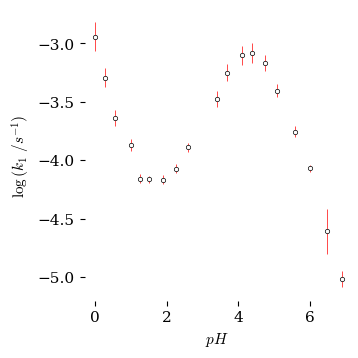

Plot of log(kobs) vs pH data only. NO curve fit
Data obtained by curve fits of UV-vis abs vs time kinetic runs
Error bars are 30X standard deviation (so that they are visible
  and can be better compared


In [204]:
import pandas as pd

df = pd.read_csv("results2.csv", skipinitialspace=True, comment="#")

x = df["pH"]
y1 = unp.uarray(df["log_k1 value"],df["log_k1 stdev"])
#y1 = unp.log10(y1)

y1n = unp.nominal_values(y1)
y1s = unp.std_devs(y1)

######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

# Settings for plot
ax.set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
#       ylim=[-0.03,0.65]
       )

### Data graphics
ax.scatter(x, y1n, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.errorbar(x, y1n, y1s*30, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0)

### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06A_Kirby2_data_k1.pdf")
plt.show()

print("Plot of log(kobs) vs pH data only. NO curve fit")
print("Data obtained by curve fits of UV-vis abs vs time kinetic runs")
print("Error bars are 30X standard deviation (so that they are visible")
print("  and can be better compared")


## Define the Function

For a curve fit we must first create a function that takes the x-axis values and parameters and returns the y-values. We can then use an experimental set of x and y-values to find the parameters that give a best fit. First let us plot the data from our values for $k_1$ vs pH against a line calculated using parameters from table 2 in the paper.

We see that the fit is very close. But we will perform our own line fit eventually anyway.

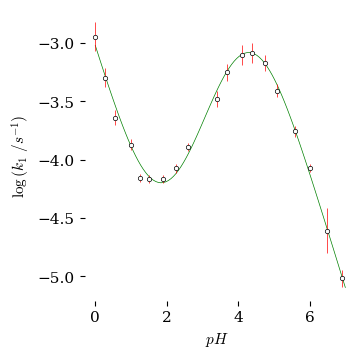

Plot of log(kobs) vs pH data only. NO curve fit
Data obtained by curve fits of UV-vis abs vs time kinetic runs
Green line is calculated using parameters from paper for comparison


In [205]:
### Curve Fit
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as un
from uncertainties import unumpy as unp

def catalysis(pH, k_H, k_AH2, k_AH, pKa_AH = 4.76, pKa_AH2 = 3.85):

    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion

    k_obs = (k_H * H**3 + k_AH2 * H**2 + k_AH * Ka_AH2 * H) \
        / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)

    return(k_obs)


pH_array = np.linspace(0,7,100)
k_H = 9.2E-4      # rate for specific acid catalysis of AH2 species (protonated AH2)
k_AH = 1.4E-3     # rate for monoanion species
k_AH2 = 3.7E-5    # rate for AH2 neutral species

k_obs_paper_fit = catalysis(pH_array, k_H, k_AH2, k_AH)
log_k_obs_paper_fit = np.log10(k_obs)


######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,4])  

# Settings for plot
ax.set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
#       ylim=[-0.03,0.65]
       )

### Data graphics
ax.scatter(x, y1n, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.errorbar(x, y1n, y1s*30, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0, zorder = 3)
ax.plot(pH_array, log_k_obs_paper_fit, color = "green", linewidth = 0.5, zorder = 1)


### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06B_Kirby2_data_k1_with_fit_using_paper_parameters.pdf")
plt.show()

print("Plot of log(kobs) vs pH data only. NO curve fit")
print("Data obtained by curve fits of UV-vis abs vs time kinetic runs")
print("Green line is calculated using parameters from paper for comparison")

## Curve Fit

Here we will use lmfit to fit the data to the model and see if we get values close to those reported by the authors.  We will also see if our calculated standard deviations are similar.

This is a three-parameter fit using fixed values for $pKa_{AH2} = 4.76$ and $pKa_{AH} = 3.85$. When we use weights based on the standard deviations we see that there is a significant deviation in our line fit from the authors fit. However when we remove the weights (comment out the line of code that set the weights) we get a very close match.


[[Model]]
    Model(catalysis)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 19
    # variables        = 3
    chi-square         = 15724.4227
    reduced chi-square = 982.776421
    Akaike info crit   = 133.652096
    Bayesian info crit = 136.485413
    R-squared          = 0.98852298
[[Variables]]
    k_H:    7.3228e-04 +/- 7.9812e-05 (10.90%) (init = 0.000924)
    k_AH2:  4.0374e-05 +/- 3.9703e-06 (9.83%) (init = 0.0014)
    k_AH:   0.00144792 +/- 6.2174e-05 (4.29%) (init = 3.7e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_H, k_AH2)  = -0.6323
    C(k_AH2, k_AH) = -0.3078
    C(k_H, k_AH)   = +0.1512
(k_H) = (7.3228+/-0.7981)e-04
(k_AH2) = (4.0374+/-0.3970)e-05
(k_AH) = (1.4479+/-0.0622)e-03
[ 0.16602706  0.07543071 -0.03169772  0.06594767 -0.08679569 -0.00898577
  0.01843874  0.02821097  0.03975022 -0.0839961  -0.03139058 -0.02059126
 -0.01443832 -0.01113783 -0.05817712 -0.01910891  0.03212156 -0.02352

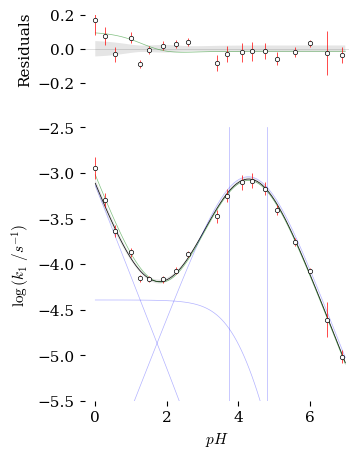

Fit of log(kobs) vs pH with weights
pKas are fixed. Fit for kH, kAH, kAH2
Green line is calculated using parameters from paper


In [228]:
# x is pH, y1n is data (s-1) and y1s is stdevs

import lmfit     

df = pd.read_csv("results2.csv", skipinitialspace=True, comment="#")

x = df["pH"]
y1 = unp.uarray(df["log_k1 value"],df["log_k1 stdev"])
#y1 = unp.log10(y1)

y1n = unp.nominal_values(y1)
y1s = unp.std_devs(y1)

def catalysis(pH, k_H, k_AH2, k_AH):

    pKa_AH = 4.76
    pKa_AH2 = 3.85
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion

    k_obs = (k_H * H**3 + k_AH2 * H**2 + k_AH * Ka_AH2 * H) \
        / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)
    
    log_k_obs = np.log10(k_obs)

    return(log_k_obs)

##########################
### use lmfit to fit data to function 
##########################

y = y1n
ys = y1s
pH = df["pH"]
x = pH

mod = lmfit.Model(catalysis, nan_policy = 'omit')  # load the function f as the model to be fit

                                    # state the parameters (use the text strings that we used above in sympy)
pars = mod.make_params(k_H = dict(value = 9.24E-4, min = 1E-15),
                       k_AH2 = dict(value = 1.4E-3, min = 1E-15),
                       k_AH = dict(value = 3.7E-5, min = 1E-15),
                       pKa_AH = dict(value = 4.76, min = 1, max = 7),
                       pKa_AH2 = dict(value = 3.85, min = 1, max = 7),
                       )    # initial values are also set here
                                    
result = mod.fit(y, pars, pH=x,
                 weights = 1/ys
                 )  # Use the .fit method on the model object to perform the curve fit
                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())

k_H_fit = result.uvars['k_H']
k_AH2_fit = result.uvars['k_AH2']
k_AH_fit = result.uvars['k_AH']
#
print(f"(k_H) = {k_H_fit:0.4e}")
print(f"(k_AH2) = {k_AH2_fit:0.4e}")
print(f"(k_AH) = {k_AH_fit:0.4e}")

pH_array = np.linspace(0,7,100)

l_k_obs = result.eval(pH=pH_array)
devs = result.eval_uncertainty(pH=pH_array, sigma = 1)
residuals = -result.residual

y_fit = unp.uarray(l_k_obs,devs)
#log_y = unp.log10(y_fit)
log_y = y_fit

y_values = l_k_obs


######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[4,5], height_ratios=[1, 4])  

# Settings for plot
ax[1].set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
       ylim=[-5.5,-2.5]
       )

### Data graphics
ax[1].scatter(x, y, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax[1].errorbar(x, y, ys*30, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0, zorder = 3)
ax[1].plot(pH_array, y_values, color = "black", linewidth = 0.5, zorder = 1)

######################
#### Create Confidence band upper and lower bounds
######################

# upper and lower bounds of uncertain kobs as float values
fit_up = y_values + devs
fit_dn = y_values - devs

# make filled band
ax[1].fill_between(pH_array, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")

######################
### Plot the residuals
######################

# difference between data and line-fit
#residuals = -result.residual      
residuals = y - result.eval(pH=pH)      
print(residuals)
ax[0].set(
#          title = Title,       
          ylabel=r"Residuals", 
          xlabel=r"",                
          xlim=[-0.3, 7.1],                  
          ylim=[-0.2,+0.2]
       )
### Data graphics
ax[0].scatter(x, residuals, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3)
ax[0].errorbar(x, residuals, ys*20, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0, zorder = 2)

# make filled band
ax[0].fill_between(pH_array, devs, -devs, 
                   facecolor="black", alpha=0.1, zorder = 1,
                   linewidth = 0, label="confidence interval")

ax[0].axhline(0, color='lightgray', linewidth=0.5, zorder = 0) 
ax[0].set_xticks([])

####################################################
### Calculate and Plot Components
####################################################

def kH_component(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion
    k_obs = (k_H * H**3 ) / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)
    log_k_obs = np.log10(k_obs)
    return(log_k_obs)

def kAH_component(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion
    k_obs = (k_AH2 * H**2 ) / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH) 
    log_k_obs = np.log10(k_obs)
    return(log_k_obs)

def kAH2_component(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion
    k_obs = (k_AH * Ka_AH2 * H) / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)    
    log_k_obs = np.log10(k_obs)
    return(log_k_obs)

ax[1].axvline(x=pKa_AH2.n, color = "blue", alpha = 0.3,
              linewidth = 0.5, zorder = 1)

ax[1].axvline(x=pKa_AH.n, color = "blue", alpha = 0.3,
              linewidth = 0.5, zorder = 1)

kH_line = kH_component(pH_array, k_H_fit.n, k_AH2_fit.n, k_AH_fit.n, pKa_AH.n, pKa_AH2.n)
ax[1].plot(pH_array, kH_line, 
           color = "blue", alpha = 0.3,
           linewidth = 0.5, zorder = 1)
kAH_line = kAH_component(pH_array, k_H_fit.n, k_AH2_fit.n, k_AH_fit.n, pKa_AH.n, pKa_AH2.n)
ax[1].plot(pH_array, kAH_line, 
           color = "blue", alpha = 0.3,
           linewidth = 0.5, zorder = 1)
kAH2_line = kAH2_component(pH_array, k_H_fit.n, k_AH2_fit.n, k_AH_fit.n, pKa_AH.n, pKa_AH2.n)
ax[1].plot(pH_array, kAH2_line, 
           color = "blue", alpha = 0.3,
           linewidth = 0.5, zorder = 1)




####################################################
### Plot original author's line on main plot and in residuals
####################################################
ax[1].plot(pH_array, log_k_obs_paper_fit, color = "green", alpha = 0.5, linewidth = 0.5, zorder = 1)
ax[0].plot(pH_array, log_k_obs_paper_fit - y_values, color = "green", alpha = 0.5, linewidth = 0.5, zorder = 1)

### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06B_Kirby2_data_k1_with_fit_using_paper_parameters.pdf")
plt.show()

print("Fit of log(kobs) vs pH with weights")
print("pKas are fixed. Fit for kH, kAH, kAH2")
print("Green line is calculated using parameters from paper")

### Line Fit with Weights

This is a five-parameter line fit and I used the standard deviations of the data set to weight the data. You can see this fits close to the values reported by the authors with significant deviations. All deviations are within the 95% confidence band. This hints that the authors did not used weights in their data analysis (maybe).

[[Model]]
    Model(catalysis)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 81
    # data points      = 19
    # variables        = 5
    chi-square         = 12820.8945
    reduced chi-square = 915.778181
    Akaike info crit   = 133.773458
    Bayesian info crit = 138.495653
    R-squared          = 0.98959035
[[Variables]]
    k_H:      7.8218e-04 +/- 8.7452e-05 (11.18%) (init = 0.000924)
    k_AH2:    3.4960e-05 +/- 5.3781e-06 (15.38%) (init = 0.0014)
    k_AH:     0.00108273 +/- 1.6535e-04 (15.27%) (init = 3.7e-05)
    pKa_AH:   4.90754388 +/- 0.08223377 (1.68%) (init = 4.76)
    pKa_AH2:  3.62709758 +/- 0.10818598 (2.98%) (init = 3.85)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_AH, pKa_AH)    = -0.9521
    C(k_AH, pKa_AH2)   = +0.8683
    C(pKa_AH, pKa_AH2) = -0.8236
    C(k_H, k_AH2)      = -0.7179
    C(k_AH2, pKa_AH2)  = +0.5549
    C(k_H, pKa_AH2)    = -0.3353
    C(k_AH2, k_AH)     = +0.2539
    C(k_AH2, pKa_AH)   = -0.2378

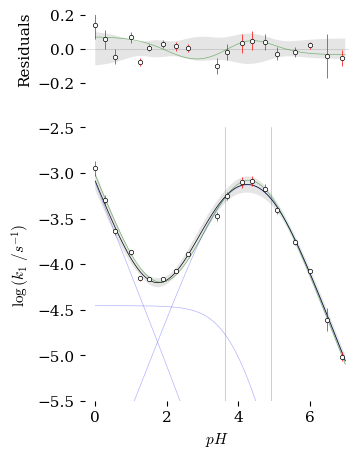

fit of log(kobs) vs pH with weights
Fit for kH, kAH2, kAH, pKaAH2, pKaAH
Green line is calculated using parameters from paper


In [223]:
# x is pH, y1n is data (s-1) and y1s is stdevs

import lmfit  
import pandas as pd

df = pd.read_csv("results2.csv", skipinitialspace=True, comment="#")

x = df["pH"]
y1 = unp.uarray(df["log_k1 value"],df["log_k1 stdev"])
#y1 = unp.log10(y1)

y1n = unp.nominal_values(y1)
y1s = unp.std_devs(y1)

def catalysis(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):

    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion

    k_obs = (k_H * H**3 + k_AH2 * H**2 + k_AH * Ka_AH2 * H) \
        / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)
    
    log_k_obs = np.log10(k_obs)

    return(log_k_obs)

##########################
### use lmfit to fit data to function 
##########################

y = y1n
ys = y1s
pH = df["pH"]
x = pH

#y = y1n[2:]
#ys = y1s[2:]
#pH = df["pH"]
#x = pH[2:]



mod = lmfit.Model(catalysis, nan_policy = 'omit')  # load the function f as the model to be fit

                                    # state the parameters (use the text strings that we used above in sympy)
pars = mod.make_params(k_H = dict(value = 9.24E-4, min = 1E-15),
                       k_AH2 = dict(value = 1.4E-3, min = 1E-15),
                       k_AH = dict(value = 3.7E-5, min = 1E-15),
                       pKa_AH = dict(value = 4.76, min = 1, max = 7),
                       pKa_AH2 = dict(value = 3.85, min = 1, max = 7),
                       )    # initial values are also set here
                                    
result = mod.fit(y, pars, pH=x,
                 weights = 1/ys)  # Use the .fit method on the model object to perform the curve fit
                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())
print()
print(result.ci_report())
print()


k_H_fit = result.uvars['k_H']
k_AH2_fit = result.uvars['k_AH2']
k_AH_fit = result.uvars['k_AH']
pKa_AH2 = result.uvars['pKa_AH2']
pKa_AH = result.uvars['pKa_AH']
#
print(f"log k_H = {unp.log10(k_H_fit):0.4f}")
print(f"log k_AH2 = {unp.log10(k_AH2_fit):0.4f}")
print(f"log k_AH = {unp.log10(k_AH_fit):0.4f}")
print(f"pKa_AH2 = {pKa_AH2:0.4f}")
print(f"pKa_AH = {pKa_AH:0.4f}")

pH_array = np.linspace(0,7,100)

log_y = result.eval(pH=pH_array)
devs = result.eval_uncertainty(pH=pH_array, sigma = 2)

### y_fit = unp.uarray(k_obs,devs)
### log_y = k_obs
### 
### y_values = unp.nominal_values(log_y)
### y_stdev = unp.std_devs(log_y)


######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[4,5], height_ratios=[1, 4])  

# Settings for plot
ax[1].set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
       ylim=[-5.5,-2.5]
       )

### Data graphics
ax[1].scatter(x, y, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax[1].errorbar(x, y, ys*20, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0, zorder = 3)
ax[1].plot(pH_array, log_y, color = "black", linewidth = 0.5, zorder = 1)

######################
#### Create Confidence band upper and lower bounds
######################

# upper and lower bounds of uncertain kobs as float values
fit_up = log_y + devs
fit_dn = log_y - devs

# make filled band
ax[1].fill_between(pH_array, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")

######################
### Plot the residuals
######################

# difference between data and line-fit
residuals = -result.residual      
residuals = y - result.eval(pH=pH)      
print(residuals)
ax[0].set(
#          title = Title,       
          ylabel=r"Residuals", 
          xlabel=r"",                
          xlim=[-0.3, 7.1],                  
          ylim=[-0.2,+0.2]
       )
### Data graphics
ax[0].scatter(x, residuals, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3)
ax[0].errorbar(x, residuals, ys*20, marker = None,
            ecolor = "red", elinewidth = 0.5, capsize = 0,
            linewidth = 0, zorder = 2)

# make filled band
ax[0].fill_between(pH_array, devs, -devs, 
                   facecolor="black", alpha=0.1, zorder = 1,
                   linewidth = 0, label="confidence interval")

ax[0].axhline(0, color='lightgray', linewidth=0.5, zorder = 0) 
ax[0].set_xticks([])

####################################################
### Calculate and Plot Components
####################################################

def kH_component(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion
    k_obs = (k_H * H**3 ) / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)
    log_k_obs = np.log10(k_obs)
    return(log_k_obs)

def kAH_component(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion
    k_obs = (k_AH2 * H**2 ) / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH) 
    log_k_obs = np.log10(k_obs)
    return(log_k_obs)

def kAH2_component(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion
    k_obs = (k_AH * Ka_AH2 * H) / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)    
    log_k_obs = np.log10(k_obs)
    return(log_k_obs)

ax[1].axvline(x=pKa_AH2.n, color = "blue", alpha = 0.3,
              linewidth = 0.5, zorder = 1)

ax[1].axvline(x=pKa_AH.n, color = "blue", alpha = 0.3,
              linewidth = 0.5, zorder = 1)

kH_line = kH_component(pH_array, k_H_fit.n, k_AH2_fit.n, k_AH_fit.n, pKa_AH.n, pKa_AH2.n)
ax[1].plot(pH_array, kH_line, 
           color = "blue", alpha = 0.3,
           linewidth = 0.5, zorder = 1)
kAH_line = kAH_component(pH_array, k_H_fit.n, k_AH2_fit.n, k_AH_fit.n, pKa_AH.n, pKa_AH2.n)
ax[1].plot(pH_array, kAH_line, 
           color = "blue", alpha = 0.3,
           linewidth = 0.5, zorder = 1)
kAH2_line = kAH2_component(pH_array, k_H_fit.n, k_AH2_fit.n, k_AH_fit.n, pKa_AH.n, pKa_AH2.n)
ax[1].plot(pH_array, kAH2_line, 
           color = "blue", alpha = 0.3,
           linewidth = 0.5, zorder = 1)




####################################################
### Plot original author's line on main plot and in residuals
####################################################
ax[1].plot(pH_array, log_k_obs_paper_fit, color = "green", alpha = 0.5, linewidth = 0.5, zorder = 1)
ax[0].plot(pH_array, log_k_obs_paper_fit - log_y, color = "green", alpha = 0.5, linewidth = 0.5, zorder = 1)

### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06B_Kirby2_data_k1_with_fit_using_paper_parameters.pdf")
plt.show()

print("fit of log(kobs) vs pH with weights")
print("Fit for kH, kAH2, kAH, pKaAH2, pKaAH")
print("Green line is calculated using parameters from paper")

### Line Fit with No Weights

This is a five-parameter line fit but I did not use the standard deviations of the data set to weight the data. You can see this fits very close to the values reported by the authors and show that the author also did not use weights in their line fit (maybe). It would have been nice if Python had been invented in 2000* and the author could have used it to presebt their work in an interactiove notebook (invented in 2014)

*(Python 2.0 was released in the year 2000 and interactive Python was released in 2001. matplotlib was released in 2003 and many of the tools that we used were developed later than that. So we can't blame anyone for not using Jupyter Notebooks. But I am calling 2024 the cut-off-date on that. Its time to always document your data analysis.)

[[Model]]
    Model(catalysis)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 128
    # data points      = 19
    # variables        = 5
    chi-square         = 0.04454381
    reduced chi-square = 0.00318170
    Akaike info crit   = -105.058699
    Bayesian info crit = -100.336504
    R-squared          = 0.99206913
[[Variables]]
    k_H:      8.7315e-04 +/- 7.1977e-05 (8.24%) (init = 0.000924)
    k_AH2:    3.5594e-05 +/- 6.3601e-06 (17.87%) (init = 0.0014)
    k_AH:     0.00124492 +/- 1.7956e-04 (14.42%) (init = 3.7e-05)
    pKa_AH:   4.81440377 +/- 0.07943319 (1.65%) (init = 4.76)
    pKa_AH2:  3.75579058 +/- 0.12039884 (3.21%) (init = 3.85)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_AH, pKa_AH)    = -0.9385
    C(k_AH, pKa_AH2)   = +0.8769
    C(pKa_AH, pKa_AH2) = -0.8136
    C(k_H, k_AH2)      = -0.5395
    C(k_AH2, pKa_AH2)  = +0.5321
    C(k_AH2, k_AH)     = +0.3145
    C(k_AH2, pKa_AH)   = -0.2859
    C(k_H, pKa_AH2)    = -0.23

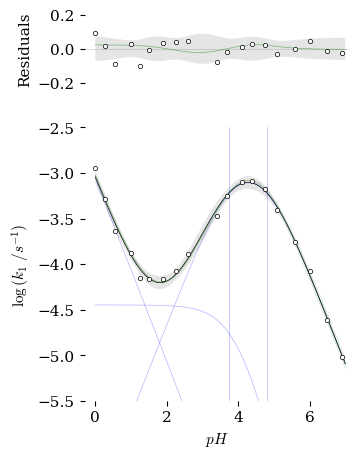

fit of log(kobs) vs pH with NO weights
Fit for kH, kAH2, kAH, pKaAH2, pKaAH
Green line is calculated using parameters from paper


In [226]:
# No weights used

# x is pH, y1n is data (s-1) and y1s is stdevs

import lmfit  
import pandas as pd

df = pd.read_csv("data/Fig1-Kirby2002_data.csv", skipinitialspace=True, comment="#")
#print(df.head())

df2 = df[["pH","k_1"]].dropna()
#print(df2.head())



x = df["pH"]
y = df["k_1"]*1E-5
log_y = np.log10(y)

def catalysis(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):

    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion

    k_obs = (k_H * H**3 + k_AH2 * H**2 + k_AH * Ka_AH2 * H) \
        / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)
    
    log_k_obs = np.log10(k_obs)

    return(log_k_obs)

##########################
### use lmfit to fit data to function 
##########################




mod = lmfit.Model(catalysis, nan_policy = 'omit')  # load the function f as the model to be fit

                                    # state the parameters (use the text strings that we used above in sympy)
pars = mod.make_params(k_H = dict(value = 9.24E-4, min = 1E-15),
                       k_AH2 = dict(value = 1.4E-3, min = 1E-15),
                       k_AH = dict(value = 3.7E-5, min = 1E-15),
                       pKa_AH = dict(value = 4.76, min = 1, max = 7),
                       pKa_AH2 = dict(value = 3.85, min = 1, max = 7),
                       )    # initial values are also set here
                                    
result = mod.fit(log_y, pars, pH=x)  # Use the .fit method on the model object to perform the curve fit
                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())
print()

print(result.ci_report())
print()

k_H_fit = result.uvars['k_H']
k_AH2_fit = result.uvars['k_AH2']
k_AH_fit = result.uvars['k_AH']
pKa_AH2 = result.uvars['pKa_AH2']
pKa_AH = result.uvars['pKa_AH']
#
print(f"log k_H = {unp.log10(k_H_fit):0.4f}")
print(f"log k_AH2 = {unp.log10(k_AH2_fit):0.4f}")
print(f"log k_AH = {unp.log10(k_AH_fit):0.4f}")
print(f"pKa_AH2 = {pKa_AH2:0.4f}")
print(f"pKa_AH = {pKa_AH:0.4f}")

pH_array = np.linspace(0,7,100)

log_y_calc = result.eval(pH=pH_array)
devs = result.eval_uncertainty(pH=pH_array, sigma = 2)

######################
### Plots - NEW STYLED PLOTTING SECTION from 03B-Eyring_Exercises_2_curvefit.ipynb
######################

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[4,5], height_ratios=[1, 4])  

# Settings for plot
ax[1].set(ylabel=r"$\log{(k_1\ /s^{-1})}$ ", 
       xlabel=r"$pH$",                
       xlim=[-0.3,7.1],                  
       ylim=[-5.5,-2.5]
       )

### Data graphics
ax[1].scatter(x, log_y, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax[1].plot(pH_array, log_y_calc, 
           color = "black", linewidth = 0.5, 
           zorder = 1)

######################
#### Create Confidence band upper and lower bounds
######################

# upper and lower bounds of uncertain kobs as float values
fit_up = log_y_calc + devs
fit_dn = log_y_calc - devs

# make filled band
ax[1].fill_between(pH_array, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")

######################
### Plot the residuals
######################

# difference between data and line-fit
residuals = -result.residual      

ax[0].set(
#          title = Title,       
          ylabel=r"Residuals", 
          xlabel=r"",                
          xlim=[-0.3, 7.1],                  
          ylim=[-0.2,+0.2]
       )
### Data graphics
ax[0].scatter(pH, residuals, marker = "o", s = 10, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3)

# make filled band
ax[0].fill_between(pH_array, devs, -devs, 
                   facecolor="black", alpha=0.1, zorder = 1,
                   linewidth = 0, label="confidence interval")

ax[0].axhline(0, color='lightgray', linewidth=0.5, zorder = 0) 
ax[0].set_xticks([])

####################################################
### Calculate and Plot Components
####################################################

def kH_component(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion
    k_obs = (k_H * H**3 ) / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)
    log_k_obs = np.log10(k_obs)
    return(log_k_obs)

def kAH_component(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion
    k_obs = (k_AH2 * H**2 ) / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH) 
    log_k_obs = np.log10(k_obs)
    return(log_k_obs)

def kAH2_component(pH, k_H, k_AH2, k_AH, pKa_AH, pKa_AH2):
    H = 10**(-pH)
    Ka_AH2 = 10**(-pKa_AH2)  # Ka for neutral species 
    Ka_AH = 10**(-pKa_AH)    # Ka for monanion to give inactive dianion
    k_obs = (k_AH * Ka_AH2 * H) / (H**2 + Ka_AH2 * H + Ka_AH2 * Ka_AH)    
    log_k_obs = np.log10(k_obs)
    return(log_k_obs)

ax[1].axvline(x=pKa_AH2.n, color = "blue", alpha = 0.3,
              linewidth = 0.5, zorder = 1)

ax[1].axvline(x=pKa_AH.n, color = "blue", alpha = 0.3,
              linewidth = 0.5, zorder = 1)

kH_line = kH_component(pH_array, k_H_fit.n, k_AH2_fit.n, k_AH_fit.n, pKa_AH.n, pKa_AH2.n)
ax[1].plot(pH_array, kH_line, 
           color = "blue", alpha = 0.3,
           linewidth = 0.5, zorder = 1)
kAH_line = kAH_component(pH_array, k_H_fit.n, k_AH2_fit.n, k_AH_fit.n, pKa_AH.n, pKa_AH2.n)
ax[1].plot(pH_array, kAH_line, 
           color = "blue", alpha = 0.3,
           linewidth = 0.5, zorder = 1)
kAH2_line = kAH2_component(pH_array, k_H_fit.n, k_AH2_fit.n, k_AH_fit.n, pKa_AH.n, pKa_AH2.n)
ax[1].plot(pH_array, kAH2_line, 
           color = "blue", alpha = 0.3,
           linewidth = 0.5, zorder = 1)




####################################################
### Plot original author's line on main plot and in residuals
####################################################
ax[1].plot(pH_array, log_k_obs_paper_fit, color = "green", alpha = 0.5, linewidth = 0.5, zorder = 1)
ax[0].plot(pH_array, log_k_obs_paper_fit - log_y_calc, color = "green", alpha = 0.5, linewidth = 0.5, zorder = 1)


### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("plots/06B_Kirby2_data_k1_with_fit_using_paper_data.pdf")
plt.show()

print("fit of log(kobs) vs pH with NO weights")
print("Fit for kH, kAH2, kAH, pKaAH2, pKaAH")
print("Green line is calculated using parameters from paper")

## Extra Stuff

Below are some equations that I made as I derived the line fit formula for myself. I used these to cut and paste formulas from to save retyping the latex code. Im keeping them here in case I need them again.

$[A]_t = [AH_3^+] + [AH_2] + [AH^-] + [A^{2-}]$


$$AH_3 = \frac{AH_2 \cdot H}{K_{a_{AH_3}}}$$
$$HA_2$$
$$AH = \frac{K_{a_{AH_2}} \cdot AH_2 }{H}$$
$$A = \frac{K_{a_{AH}} \cdot AH }{H} $$

$$ A = \frac{K_{a_{AH}} \cdot \frac{K_{a_{AH_2}} \cdot AH_2 }{H} }{H}   $$
$$ A = \frac{K_{a_{AH}} \cdot {K_{a_{AH_2}}} \cdot AH_2 }{H^2}$$

$$[A]_t = \frac{AH_2 \cdot H}{K_{a_{AH_3}}} + [AH_2] + \frac{K_{a_{AH_2}} \cdot AH_2 }{H} + \frac{K_{a_{AH}} \cdot {K_{a_{AH_2}}} \cdot AH_2 }{H^2}$$

$$[A]_t = AH_2\left(\frac{ H}{K_{a_{AH_3}}} + 1 + \frac{K_{a_{AH_2}} }{H} + \frac{K_{a_{AH}} \cdot {K_{a_{AH_2}}} }{H^2}\right)$$

$$[A]_t = AH_2\left(\frac{ H^3}{K_{a_{AH_3}}H^2} + \frac{K_{a_{AH_3}}H^2}{K_{a_{AH_3}}H^2} + \frac{K_{a_{AH_3}} K_{a_{AH_2}} H}{ K_{a_{AH_3}}H^2} + \frac{K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }{K_{a_{AH_3}} H^2}\right)$$

$$[A]_t = AH_2\frac{{ H^3} + {K_{a_{AH_3}}H^2} + {K_{a_{AH_3}} K_{a_{AH_2}} H} + {K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }}{{K_{a_{AH_3}}H^2}}$$

$$ AH_2 = [A]_t\frac{{K_{a_{AH_3}}H^2}}{{ H^3} + {K_{a_{AH_3}}H^2} + {K_{a_{AH_3}} K_{a_{AH_2}} H} + {K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }}$$

$$ \nu_{AH_2} = [A]_t
\frac{{k_{AH_2} K_{a_{AH_3}}H^2}}
{{ H^3} + {K_{a_{AH_3}}H^2} + {K_{a_{AH_3}} K_{a_{AH_2}} H} + {K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }}$$

$$ \nu = [A]_t
\frac{k_{AH_3^+}H^3 + {k_{AH_2} K_{a_{AH_3}}H^2} + k_{AH^-}K_{a_{AH_3}}K_{a_{AH_2}}H}
{{ H^3} + {K_{a_{AH_3}}H^2} + {K_{a_{AH_3}} K_{a_{AH_2}} H} + {K_{a_{AH}} {K_{a_{AH_3}} K_{a_{AH_2}}} }}$$

